In [1]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import scipy
from scipy import stats
from scipy.stats import levene
import numpy as np
import sklearn
from sklearn import datasets

In [2]:
#импорт данных
df = pd.read_excel('variant_40.xlsx', sheet_name='v40_3')
df = pd.DataFrame(df)
df.head()

,Group,Value
0,A,141.90
1,A,149.95
2,A,136.28
3,A,114.06
4,A,138.26


In [3]:
df_a = df[df['Group'] == 'A']
df_a.head()

,Group,Value
0,A,141.90
1,A,149.95
2,A,136.28
3,A,114.06
4,A,138.26


In [4]:
df_b = df[df['Group'] == 'B']
df_b.head()

,Group,Value
27,B,133.91
28,B,135.69
29,B,164.11
30,B,126.47
31,B,135.75


In [5]:
df_c = df[df['Group'] == 'C']
df_c.head()

,Group,Value
54,C,132.36
55,C,127.49
56,C,104.19
57,C,146.04
58,C,141.04


In [6]:
df_d = df[df['Group'] == 'D']
df_d.head()

,Group,Value
81,D,145.99
82,D,131.52
83,D,147.57
84,D,134.17
85,D,126.30


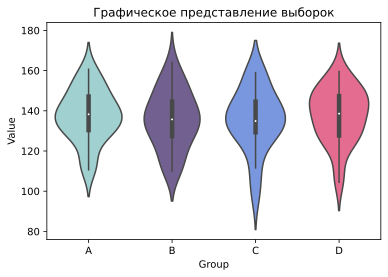

In [10]:
colors = ['#98D8D8', '#705898','#6890F0', '#F85888']
ax = sns.violinplot(x=df['Group'], y=df ['Value'],palette=colors )
ax.set_title("Графическое представление выборок")
ax.set_ylabel("Value")
ax.set_xlabel("Group");

In [16]:
#анлиз нормальности распределния выборок с помощью теста Шапиро-Уилка.А.
stat, p = scipy.stats.shapiro(df_a['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.970, p-value=0.610
Принять гипотезу о нормальности


In [17]:
#анлиз нормальности распределния выборок с помощью теста Шапиро-Уилка.B.
stat, p = scipy.stats.shapiro(df_b['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.979, p-value=0.840
Принять гипотезу о нормальности


In [18]:
#анлиз нормальности распределния выборок с помощью теста Шапиро-Уилка.C.
stat, p = scipy.stats.shapiro(df_c['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.946, p-value=0.166
Принять гипотезу о нормальности


In [30]:
#анлиз нормальности распределния выборок с помощью теста Шапиро-Уилка.D.
stat, p = scipy.stats.shapiro(df_d['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.960, p-value=0.373
Принять гипотезу о нормальности


In [38]:
#Тест Бартлетта на гомогенность дисперсий
from scipy.stats import bartlett
stat, p = bartlett(df_a['Value'],df_b['Value'],df_c['Value'], df_d['Value'])
print(stat, p)

0.9580263931863932 0.8114068179419772


In [37]:
#one-way ANOVA
fvalue, pvalue = stats.f_oneway(df_a['Value'],df_b['Value'],df_c['Value'], df_d['Value'])
print(fvalue, pvalue)

0.18173038967264937 0.9085922450247291


In [40]:
print(fvalue, pvalue)
if pvalue < 0.05:
    print('One of the groups is significantly different.')
        

0.18173038967264937 0.9085922450247291


##### Однофакторный дисперсионный анализ использует следующие нулевую и альтернативную гипотезы :
##### H 0  (нулевая гипотеза):  µ 1  = µ 2  = µ 3  = … = µ k  (все средние значения совокупности равн
##### H 1  (нулевая гипотеза):  по крайней мере одно среднее значение генеральной совокупности отличается  от остальных
##### тестовая F является 0.18173038967264937 и соответствующмй p-значение 0.9085922450247291. Поскольку p-значение не меньше 0,05, мы не можем отвергнуть нулевую гипотезу. 
##### Это значит, что у нас нет достаточных доказательств того, что между группами А,В,С,D присутствует критическая разница и соответсвенно принимаем нулевую гипотезу.